<a href="https://colab.research.google.com/github/igornunespatricio/BairesDev-Machine-Learning-Practitioner/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, accuracy_score

In [2]:
tf.__version__

'2.17.1'

In [3]:
%load_ext tensorboard

In [4]:
logdir = 'log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8982 - loss: 0.3355 - val_accuracy: 0.9841 - val_loss: 0.0475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9842 - loss: 0.0490 - val_accuracy: 0.9895 - val_loss: 0.0351
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9898 - val_loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9890 - val_loss: 0.0309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9908 - val_loss: 0.0296


In [9]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


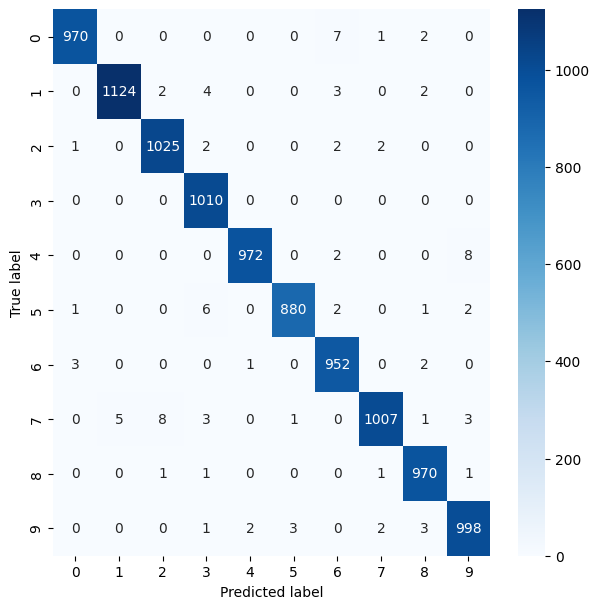

In [10]:
conf_mat = tf.math.confusion_matrix(y_true, y_pred).numpy()
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

figure = plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_df, annot=True, cmap=plt.cm.Blues, fmt='.0f')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
# Get classification report
report = classification_report(y_true, y_pred, digits=3)  # output_dict=True
print("Classification Report:\n", report)

# Alternatively, use precision_recall_fscore_support to get precision, recall, f1 and support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average=None)

# Print the individual metrics for each class
for i, label in enumerate(np.unique(y_true)):
    print(f"Class {label}: Precision={precision[i]}, Recall={recall[i]}, F1-Score={fscore[i]}")

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Compute metrics for overall average (macro or weighted)
# Macro average gives equal weight to each class, regardless of size
precision_macro = np.mean(precision)
recall_macro = np.mean(recall)
fscore_macro = np.mean(fscore)

# Weighted average gives weight to each class based on the support (number of true samples)
precision_weighted = np.average(precision, weights=support)
recall_weighted = np.average(recall, weights=support)
fscore_weighted = np.average(fscore, weights=support)

print(f"Macro average: Precision={precision_macro}, Recall={recall_macro}, F1-Score={fscore_macro}")
print(f"Weighted average: Precision={precision_weighted}, Recall={recall_weighted}, F1-Score={fscore_weighted}")


Classification Report:
               precision    recall  f1-score   support

           0      0.995     0.990     0.992       980
           1      0.996     0.990     0.993      1135
           2      0.989     0.993     0.991      1032
           3      0.983     1.000     0.992      1010
           4      0.997     0.990     0.993       982
           5      0.995     0.987     0.991       892
           6      0.983     0.994     0.989       958
           7      0.994     0.980     0.987      1028
           8      0.989     0.996     0.992       974
           9      0.986     0.989     0.988      1009

    accuracy                          0.991     10000
   macro avg      0.991     0.991     0.991     10000
weighted avg      0.991     0.991     0.991     10000

Class 0: Precision=0.9948717948717949, Recall=0.9897959183673469, F1-Score=0.9923273657289002
Class 1: Precision=0.995571302037201, Recall=0.9903083700440528, F1-Score=0.9929328621908127
Class 2: Precision=0.989382239

In [17]:
from imblearn.metrics import specificity_score

# Calculate specificity for each class
specificity = specificity_score(y_true, y_pred, average=None)

# Print the specificity for each class
for i, spec in enumerate(specificity):
    print(f"Specificity for class {i}: {spec:.3f}")

print(f"Macro average: Specificity {specificity_score(y_true, y_pred, average='macro')}")
print(f"Weighted average: Specificity {specificity_score(y_true, y_pred, average='weighted')}")

Specificity for class 0: 0.999
Specificity for class 1: 0.999
Specificity for class 2: 0.999
Specificity for class 3: 0.998
Specificity for class 4: 1.000
Specificity for class 5: 1.000
Specificity for class 6: 0.998
Specificity for class 7: 0.999
Specificity for class 8: 0.999
Specificity for class 9: 0.998
Macro average: Specificity 0.998977816330801
Weighted average: Specificity 0.9989781633080089
